<a href="https://colab.research.google.com/github/sipocz/Alarm/blob/main/decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import pandas as pd

In [ ]:
fname="/content/gdrive/MyDrive/decision_tree/train.csv"

In [ ]:
df=pd.read_csv(fname,names=["f1","f2","f3","f4","f5","f6","f7","f8","label"])

In [ ]:
feat=["f1","f2","f3","f4","f5","f6","f7","f8"]
lab=["label"]

In [ ]:
df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,label
0,5,44,6,1,986,3,38,-122,0
1,2,17,4,1,1876,3,39,-122,0
2,4,4,4,1,455,2,38,-122,0
3,4,52,5,1,889,2,38,-122,0
4,4,35,6,1,2091,4,34,-118,1


In [ ]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
cf=DecisionTreeClassifier(criterion="entropy",min_samples_split=2)

In [ ]:
features=df[feat]
labels=df[lab]

In [ ]:
labels.head()

,label
0,0
1,0
2,0
3,0
4,1


In [ ]:
cf.fit(features,labels)

DecisionTreeClassifier(criterion='entropy')

[Text(0.4, 0.8333333333333334, 'x[7] <= -118.5\nentropy = 0.992\nsamples = 150\nvalue = [83, 67]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 75\nvalue = [75, 0]'),
 Text(0.6, 0.5, 'x[4] <= 596.0\nentropy = 0.49\nsamples = 75\nvalue = [8, 67]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.0\nsamples = 67\nvalue = [0, 67]')]

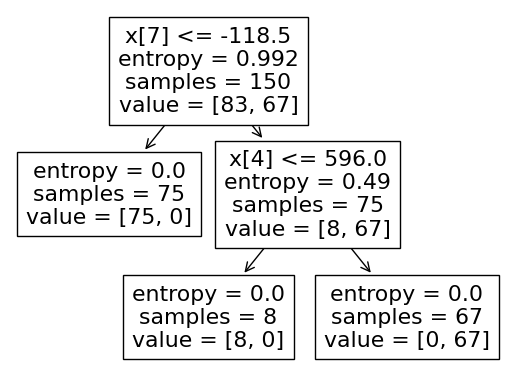

In [ ]:
tree.plot_tree(cf)

In [ ]:
def get_entropy(n_cat1: int, n_cat2: int) -> float:
    import math
    entropy = 0
    if n_cat1==0 or n_cat2==0:
        return 0
    cat_sum=n_cat1+n_cat2
    p1=n_cat1/cat_sum
    p2=n_cat2/cat_sum
    entropy=-1*(p1*math.log2(p1)+p2*math.log2(p2))
    #TODO: számítsa ki az entrópiát!
    return entropy


In [ ]:
def get_IG_separator_by_feature(features:list,labels:list,selected_feature:int,limit_value:float)->(int):
    __DEBUG__=False
    poz=0
    neg=0
    pozmin=0
    negmin=0

    pozmax=0
    negmax=0


    for index,_ in enumerate(features[:]):

        feature_value=features[index][selected_feature]
        if labels[index]==0:
            neg+=1
        else:
            poz+=1
        if feature_value<=limit_value:
            if labels[index]==0:
                negmin+=1
            else:
                pozmin+=1

        if feature_value>limit_value:
            if labels[index]==0:
                negmax+=1
            else:
                pozmax+=1

    total_entropy=get_entropy(poz,neg)
    min_entropy=get_entropy(pozmin,negmin)
    max_entropy=get_entropy(pozmax,negmax)

    IG=total_entropy-((pozmin+negmin)/(poz+neg)*min_entropy+(pozmax+negmax)/(poz+neg)*max_entropy)
    if __DEBUG__:
        print("-----------------\n** GET_IG_separator_by_feature")
        print(f"{selected_feature=}")
        print(f"{limit_value=},{IG=}")




    return IG

In [ ]:
def get_best_separation(features: list,labels: list) -> ( int, int ):
    __DEBUG__=False

    best_separation_feature, best_separation_value = None, None

    max_IG=0
    for feature in range(len(features[0])):

        for index, _ in enumerate(features[:]):
            value=features[index][feature]
            IG=get_IG_separator_by_feature(features,labels,feature,value)

            if IG>max_IG:
                max_IG=IG
                best_separation_value=value
                best_separation_feature=feature
            if __DEBUG__:
                print(f"***  {feature=} {index=}, {value=} {max_IG=} {best_separation_value=} {best_separation_feature=}")




    return best_separation_feature, best_separation_value

In [ ]:
feat=[[1,2,3,4,5,6,7,8],[11,12,13,14,15,16,17,18]]
lab=[0,0,0,0,1,1,1,1]
get_IG_separator_by_feature(feat,lab,0,4)



0.0

In [ ]:
len(features)

150

In [ ]:
type(features)

pandas.core.frame.DataFrame

In [ ]:
features[1:3]

,f1,f2,f3,f4,f5,f6,f7,f8
1,2,17,4,1,1876,3,39,-122
2,4,4,4,1,455,2,38,-122


In [ ]:
features.shape

(150, 8)

In [ ]:
from numpy import loadtxt

In [ ]:
all_data=loadtxt(fname,delimiter=",")

In [ ]:
features=all_data[:,0:8]
labels=all_data[:,8]

In [ ]:
get_best_separation(features,labels)

(7, -119.0)

In [ ]:
class decision_leaf:
    __DEBUG__=False

    def __str__(self) -> str:
        if self.node_type=="decision":
            return(f"Decision {self.level=}\n{self.decision_limit=}\n{self.decision_feature=}\n{self.node_type}\nLenfeatures:{len(self.features[:])}\n{self.entropy=} ")
        else:
            return(f"Decision {self.level=}\n{self.node_type}\n{self.entropy=} ")


    def __init__(self,features,labels,level=0,node_type="decision",decision_label=0):
        if decision_leaf.__DEBUG__:
            print(f"*** Creation ")

        if node_type=="decision":
            self.node_type=node_type
            self.level=level+1
            self.decision_limit=None
            self.decision_feature=None
            self.decision_label=None
            self.left_side=None  # decision leaf storage
            self.right_side=None  # decision leaf storage
            self.features=features
            self.labels=labels
            self.left_features=[]
            self.right_features=[]
            self.left_labels=[]
            self.right_labels=[]
            self.separate_values()

            self.entropy=1
            self.selector()

        if node_type=="leaf":
            self.node_type=node_type
            self.level=level+1
            self.decision_label=decision_label
            self.left_side=None  # no more  leaf storage
            self.right_side=None  # no more leaf storage

            self.labels=labels
            self.entropy=1



    def fit(self,level=0):
        self.separate_values()
        self.selector()

    def separate_values(self):
        self.left_features=[]
        self.right_features=[]
        self.left_labels=[]
        self.right_labels=[]

        self.decision_feature,self.decision_limit =get_best_separation(self.features,self.labels)
        if decision_leaf.__DEBUG__:
            print(f"{self.decision_feature=},{self.decision_limit=} ")


        for feature_index,feature_row in enumerate(self.features[:]):  #!!!!!
            if feature_row[self.decision_feature]<=self.decision_limit:
                self.left_features.append(feature_row)
                self.left_labels.append(self.labels[feature_index])
            else:
                self.right_features.append(feature_row)
                self.right_labels.append(self.labels[feature_index])

    def check_back_label(self,lab:list) -> int:
        if len(list(set(lab)))!=1:
            if decision_leaf.__DEBUG__:
                print("******* ERROR *****")
        return lab[0]

    def selector(self):


        r_label_0=self.right_labels.count(0)
        r_label_1=self.right_labels.count(1)
        l_label_0=self.left_labels.count(0)
        l_label_1=self.left_labels.count(1)
        r_entropy=get_entropy(r_label_0,r_label_1)
        l_entropy=get_entropy(l_label_0,l_label_1)

        if decision_leaf.__DEBUG__:
            print (f"Right Features: {len(self.right_features)}")
            print (f"Left Features: {len(self.left_features)}")
            print(f"{r_entropy=}")
            print(f"{l_entropy=}")





        if r_entropy!=0 :
            self.right_side=decision_leaf(self.right_features,self.right_labels,self.level)
        else:
            selected_label=self.check_back_label(self.right_labels)

            self.right_side=decision_leaf(self.right_features,self.right_labels,self.level,node_type="leaf",decision_label=selected_label)


        if l_entropy!=0:
            self.left_side=decision_leaf(self.left_features,self.left_labels,self.level)

        else:
            selected_label=self.check_back_label(self.left_labels)

            self.left_side=decision_leaf(self.left_features,self.left_labels,self.level,node_type="leaf",decision_label=selected_label)

        self.left_side.entropy=l_entropy
        self.right_side.entropy=r_entropy


    def decision(self,feature:list) -> int:
        '''
        decision
        '''

        if  decision_leaf.__DEBUG__:
            print(f"{self.decision_feature=} , {self.decision_limit=} {feature[self.decision_feature]<=self.decision_limit}")

        if self.left_side.node_type=="leaf" and self.right_side.node_type == "leaf" :

            if  feature[self.decision_feature]<=self.decision_limit:
                return self.left_side.decision_label
            else:
                return self.right_side.decision_label


        if self.left_side.node_type == "leaf"  and  self.right_side.node_type == "decision":

            if  feature[self.decision_feature]<=self.decision_limit:
                return self.left_side.decision_label
            else:
                return self.right_side.decision(feature)


        if self.left_side.node_type == "decision"  and  self.right_side.node_type == "leaf":

            if  feature[self.decision_feature]<=self.decision_limit:
                return self.left_side.decision(feature)
            else:
                return self.right_side.decision_label

        if self.left_side.node_type == "decision"  and  self.right_side.node_type == "decision":

            if  feature[self.decision_feature]<=self.decision_limit:
                return self.left_side.decision(feature)
            else:
                return self.right_side.decision(feature)






        return None

    def test(self,features,labels):
        c_ok=0
        c_nok=0
        for index, _ in enumerate(features[:]):
            feature=self.features[index]
            label=self.labels[index]
            out=self.decision(feature)
            if out==label:
                c_ok+=1
            else:
                c_nok+=1

        print(f"{c_ok=} + {c_nok=}={c_ok+c_nok}")


    def print_tree(self,node) -> None:
        if node.left_side != None:
            print("----------------")
            print("Left:")
            self.print_tree(node.left_side)
        if node.right_side!= None:
            print("----------------")
            print("Right:")
            self.print_tree(node.right_side)




In [ ]:
d1=decision_leaf(features,labels)

In [ ]:
d1.test(features,labels)

c_ok=150 + c_nok=0=150
